# Data load and cleaning

In [1]:
import pandas as pd

#load the data data_by_year.csv
data_by_year = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_year.csv')
#print data head
print(data_by_year.head())

   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  

In [3]:
# Check for missing values
print(data_by_year.isnull().sum())

# Get a summary of the dataset
print(data_by_year.describe())

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
        mode         year  acousticness  danceability    duration_ms  \
count  100.0   100.000000    100.000000    100.000000     100.000000   
mean     1.0  1970.500000      0.556317      0.536783  227296.752234   
std      0.0    29.011492      0.275358      0.052356   25630.048065   
min      1.0  1921.000000      0.219931      0.414445  156881.657475   
25%      1.0  1945.750000      0.289516      0.500800  210889.193536   
50%      1.0  1970.500000      0.459190      0.540976  235520.850833   
75%      1.0  1995.250000      0.856711      0.570948  247702.738058   
max      1.0  2020.000000      0.962607      0.692904  267677.823086   

           energy  instrumenta

In [4]:
#data standardization
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Feature to scale
features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Apply the scaler to the features to scale
data_by_year[features_to_scale] = scaler.fit_transform(data_by_year[features_to_scale])

# Display the first five rows of the DataFrame
print(data_by_year.head())


   mode  year  acousticness  danceability  duration_ms    energy  \
0     1  1921      1.206593     -2.268729     1.303465 -1.372612   
1     1  1922      1.395278     -1.050819    -2.424439 -1.335327   
2     1  1923      1.463369      0.778558    -1.935347 -1.182517   
3     1  1924      1.401148      0.251686    -1.421483 -0.673342   
4     1  1925      1.482933      0.711808    -1.659106 -1.081931   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0          1.241416 -0.141117 -1.643865    -0.394037 -2.567559 -2.656372   
1          1.974278  1.824215 -2.364442     0.132090 -2.682246  0.059618   
2          1.461764  1.079979 -0.699070    -0.145779 -0.355409  1.623313   
3          3.184595  1.515427 -0.732122    -0.168531  0.828525  2.288008   
4          1.843836  1.652901 -0.704637     0.074121 -0.087526  1.561357   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5  


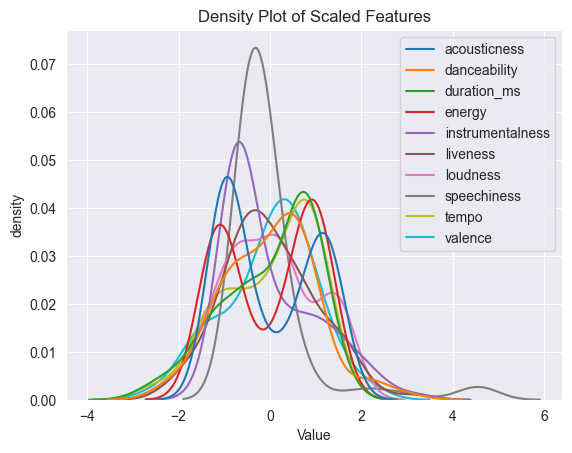

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the scaled features
sns.kdeplot(data=data_by_year[features_to_scale])
plt.title('Density Plot of Scaled Features')
plt.xlabel('Value')
plt.ylabel('density')
# save the plot
plt.savefig('/Users/taief/Desktop/MUSIC REC/data/scaled_features_year.png')
plt.show()


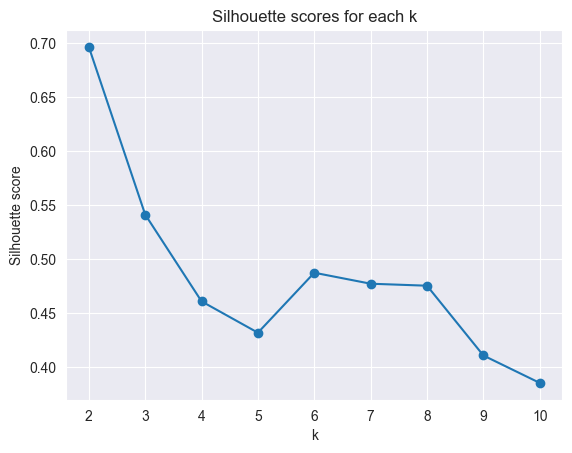

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data_by_year = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_year.csv')

features_to_scale = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']

# Range of k values to try
k_range = range(2, 11)

silhouette_scores = []  # To store the silhouette scores for each k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_by_year[features_to_scale])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_by_year[features_to_scale], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each k
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette scores for each k')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(k_range)
plt.savefig('/Users/taief/Desktop/MUSIC REC/data/silhouette_scores_year.png')


In [33]:
kmeans = KMeans(n_clusters=5, random_state=42)
data_by_year['cluster'] = kmeans.fit_predict(data_by_year[features_to_scale])

# Check the size of each cluster
print(data_by_year['cluster'].value_counts())


cluster
1    45
0    18
4    13
2    13
3    11
Name: count, dtype: int64


In [34]:
# get the centroids of the clusters
centroids = kmeans.cluster_centers_

# create a DataFrame with the centroids
centroids_df = pd.DataFrame(centroids, columns=features_to_scale)

print(centroids_df)

   acousticness  danceability    energy  instrumentalness  speechiness  \
0      0.765633      0.524781  0.299386          0.218580     0.180704   
1      0.287714      0.571035  0.611322          0.100348     0.081948   
2      0.920504      0.542099  0.280862          0.378303     0.129222   
3      0.480263      0.506876  0.490295          0.119954     0.056255   
4      0.896441      0.454827  0.255973          0.359278     0.103621   

    valence  
0  0.527217  
1  0.529423  
2  0.589879  
3  0.574373  
4  0.454735  


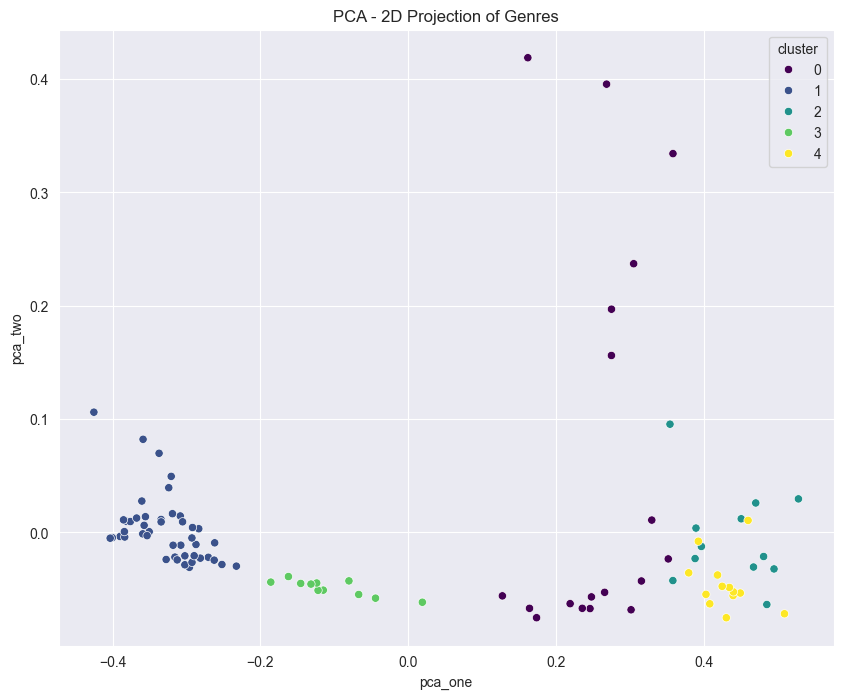

In [37]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_by_year[features_to_scale])

# Add the PCA results to the DataFrame
data_by_year['pca_one'] = pca_result[:, 0]
data_by_year['pca_two'] = pca_result[:, 1]

# Visualize the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=data_by_year, palette='viridis')
plt.title('PCA - 2D Projection of Genres')
plt.show()


In [47]:
import pandas as pd
import numpy as np

centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame({
    'acousticness': [0.713792, 0.091025, 0.862398, 0.159033, 0.260796],
    'danceability': [0.523337, 0.479150, 0.352921, 0.529956, 0.656797],
    'energy': [0.377470, 0.785803, 0.197213, 0.702070, 0.653311],
    'instrumentalness': [0.118091, 0.102088, 0.659199, 0.616341, 0.053033],
    'speechiness': [0.085114, 0.081396, 0.051876, 0.066261, 0.101309],
    'valence': [0.501842, 0.414465, 0.267685, 0.401202, 0.649468]
})

def label_clusters(centroids):
    labels = []
    for _, row in centroids.iterrows():
        if row['instrumentalness'] > 0.5:
            if row['acousticness'] > 0.7:
                labels.append('Mellow & Acoustic') # High acousticness and instrumentalness
            else:
                labels.append('Instrumental & Calm') # Instrumental but not as acoustic
        elif row['speechiness'] > 0.1:
            labels.append('Lyrical & Speech-Driven') # High speechiness
        elif row['danceability'] > 0.6:
            labels.append('Upbeat & Danceable') # High danceability
        elif row['energy'] > 0.7:
            labels.append('Energetic & Popular') # High energy
        elif row['acousticness'] > 0.7:
            labels.append('Soft & Quiet') # High acousticness, lower energy and instrumentalness
        else:
            labels.append('Other') # For any cluster that doesn't fit the above categories
    return labels

# Assign labels to the clusters
centroids_df['label'] = label_clusters(centroids_df)

# Map to the data_by_year DataFrame (assuming it's already defined and contains a 'cluster' column)
data_by_year['label'] = data_by_year['cluster'].map(centroids_df['label'])

# Display the first few rows of the DataFrame
print(data_by_year[['year', 'label', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']].head(20))

#save the data_by_year DataFrame to a CSV file
data_by_year.to_csv('/Users/taief/Desktop/MUSIC REC/data/enhanced_data_by_year.csv', index=False)
                                                                                                                                        

    year                    label  acousticness  danceability    energy  \
0   1921  Lyrical & Speech-Driven      0.886896      0.418597  0.231815   
1   1922        Mellow & Acoustic      0.938592      0.482042  0.237815   
2   1923        Mellow & Acoustic      0.957247      0.577341  0.262406   
3   1924        Mellow & Acoustic      0.940200      0.549894  0.344347   
4   1925        Mellow & Acoustic      0.962607      0.573863  0.278594   
5   1926             Soft & Quiet      0.660817      0.599880  0.211467   
6   1927        Mellow & Acoustic      0.936179      0.648268  0.264321   
7   1928        Mellow & Acoustic      0.938617      0.534288  0.207948   
8   1929             Soft & Quiet      0.601427      0.647670  0.241801   
9   1930        Mellow & Acoustic      0.936715      0.518176  0.333524   
10  1931             Soft & Quiet      0.833040      0.595222  0.234497   
11  1932        Mellow & Acoustic      0.935771      0.557798  0.302068   
12  1933             Soft